In [1]:
import pandas as pd
df = pd.read_excel(r"C:\Users\El economista\Documents\GitHub\-BigDataUBA-Grupo-25\TPs\TP 2\df_completo_original.xlsx")

In [2]:
# Renombrar la columna "edad" a "edad2"
df.rename(columns={"ch06": "edad2"}, inplace=True)

# Crear la nueva columna "edad²" con los valores al cuadrado
df["edad²"] = df["edad2"] ** 2

In [3]:
df["p21"] = df["p21"].astype(float)  # Convertir a float antes de modificar

# Aplicar el coeficiente de ajuste
df.loc[df["ano4"] == 2004, "p21"] *= 314.621568

# Calcular el salario semanal
df["salario_semanal"] = df["p21"] / 40

In [4]:
df["horastrab"] = df["pp3e_tot"] + df["pp3f_tot"]

In [7]:
# Función para calcular años de educación
def calcular_educ(row):
    if row["ch12"] == 2:  # Primario
        return row["ch14"]
    elif row["ch12"] == 4:  # Secundario
        return 12 if row["ch13"] == 1 else row["ch14"]
    elif row["ch12"] == 6:  # Terciario
        return 15 if row["ch13"] == 1 else 12 + row["ch14"]
    elif row["ch12"] == 7:  # Universitario
        return 17 if row["ch13"] == 1 else 12 + row["ch14"]
    elif row["ch12"] == 9:  # Educación especial
        return None  # No comparable
    else:
        return None  # Ns/Nr u otro valor

# Aplicar la función al DataFrame
df["educ"] = df.apply(calcular_educ, axis=1)

In [8]:
from sklearn.preprocessing import StandardScaler

# Variables para PCA
variables_pca = ["horastrab", "salario_semanal", "educ", "edad²"]

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[variables_pca])

In [13]:
from sklearn.impute import SimpleImputer

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy="mean")
X_scaled = imputer.fit_transform(X_scaled)

In [14]:
from sklearn.decomposition import PCA

# Aplicar PCA con dos componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame con los componentes calculados
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

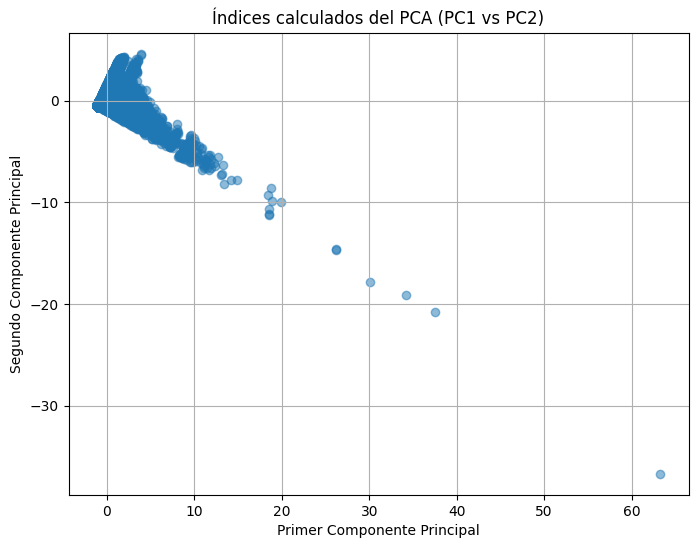

In [15]:
import matplotlib.pyplot as plt

# Gráfico de dispersión de los primeros dos componentes
plt.figure(figsize=(8,6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], alpha=0.5)
plt.xlabel("Primer Componente Principal")
plt.ylabel("Segundo Componente Principal")
plt.title("Índices calculados del PCA (PC1 vs PC2)")
plt.grid(True)
plt.show()

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Variables seleccionadas para la correlación
variables = ["edad2", "edad²", "educ", "salario_semanal", "horastrab"]

# Generar la matriz de correlaciones
correlation_matrix = df[variables].corr()

# Mostrar la matriz numérica
print(correlation_matrix)

                    edad2     edad²      educ  salario_semanal  horastrab
edad2            1.000000  0.959290  0.125090         0.153589   0.142141
edad²            0.959290  1.000000  0.091799         0.063196   0.058587
educ             0.125090  0.091799  1.000000         0.115083   0.074375
salario_semanal  0.153589  0.063196  0.115083         1.000000   0.236919
horastrab        0.142141  0.058587  0.074375         0.236919   1.000000


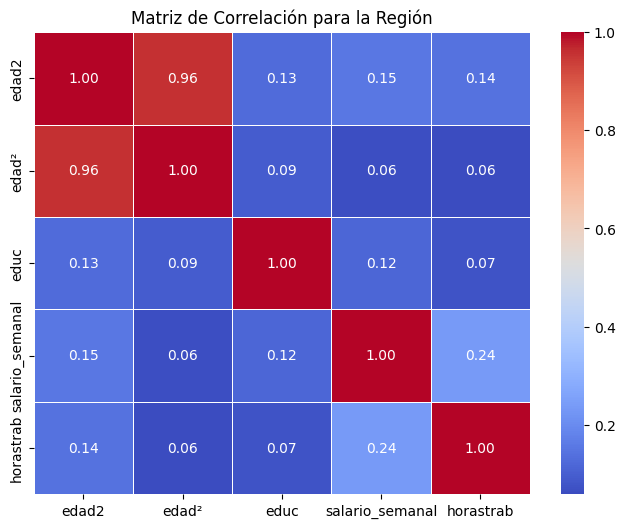

In [41]:
plt.figure(figsize=(8,6))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Matriz de Correlación para la Región")
plt.show()

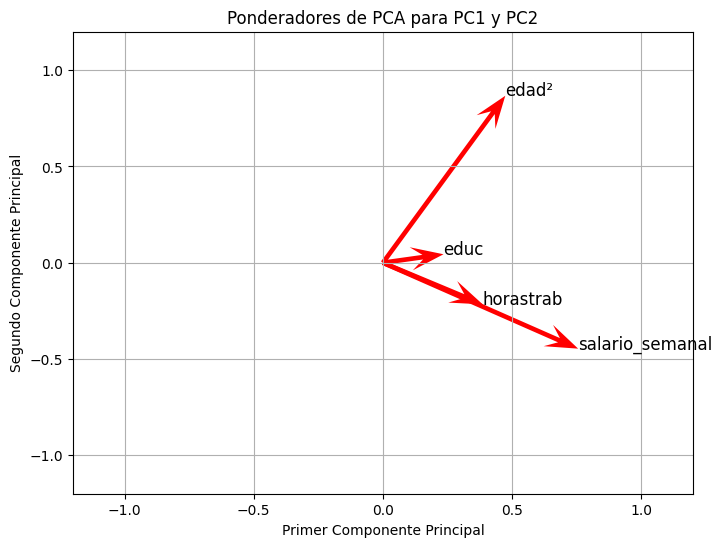

In [30]:
factor_escala = 1  # Aumentamos el tamaño de las flechas

fig, ax = plt.subplots(figsize=(8, 6))

ax.quiver(np.zeros(loadings.shape[0]), np.zeros(loadings.shape[0]),
          loadings[:,0] * factor_escala, loadings[:,1] * factor_escala,
          angles='xy', scale_units='xy', scale=1, color="r",
          headwidth=5, headlength=7)  # Ajustamos el tamaño de la punta

# Agregar etiquetas con los nombres de las variables
for i, var in enumerate(variables_pca):
    ax.text(loadings[i,0] * factor_escala, loadings[i,1] * factor_escala, var, fontsize=12)

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.xlabel("Primer Componente Principal")
plt.ylabel("Segundo Componente Principal")
plt.title("Ponderadores de PCA para PC1 y PC2")
plt.grid()
plt.show()

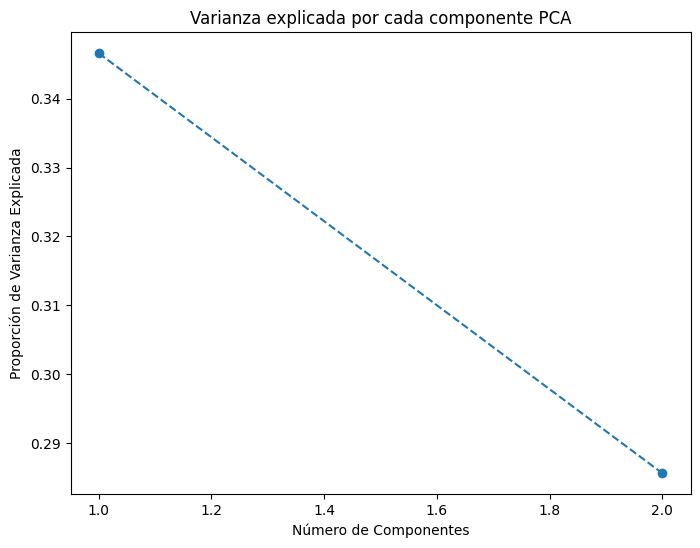

In [31]:
# Proporción de varianza explicada
plt.figure(figsize=(8,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker="o", linestyle="--")
plt.xlabel("Número de Componentes")
plt.ylabel("Proporción de Varianza Explicada")
plt.title("Varianza explicada por cada componente PCA")
plt.show()

In [37]:
from sklearn.impute import SimpleImputer

# Imputación de valores NaN con la media de cada columna
imputer = SimpleImputer(strategy="mean")
df[["edad2", "educ"]] = imputer.fit_transform(df[["edad2", "educ"]])

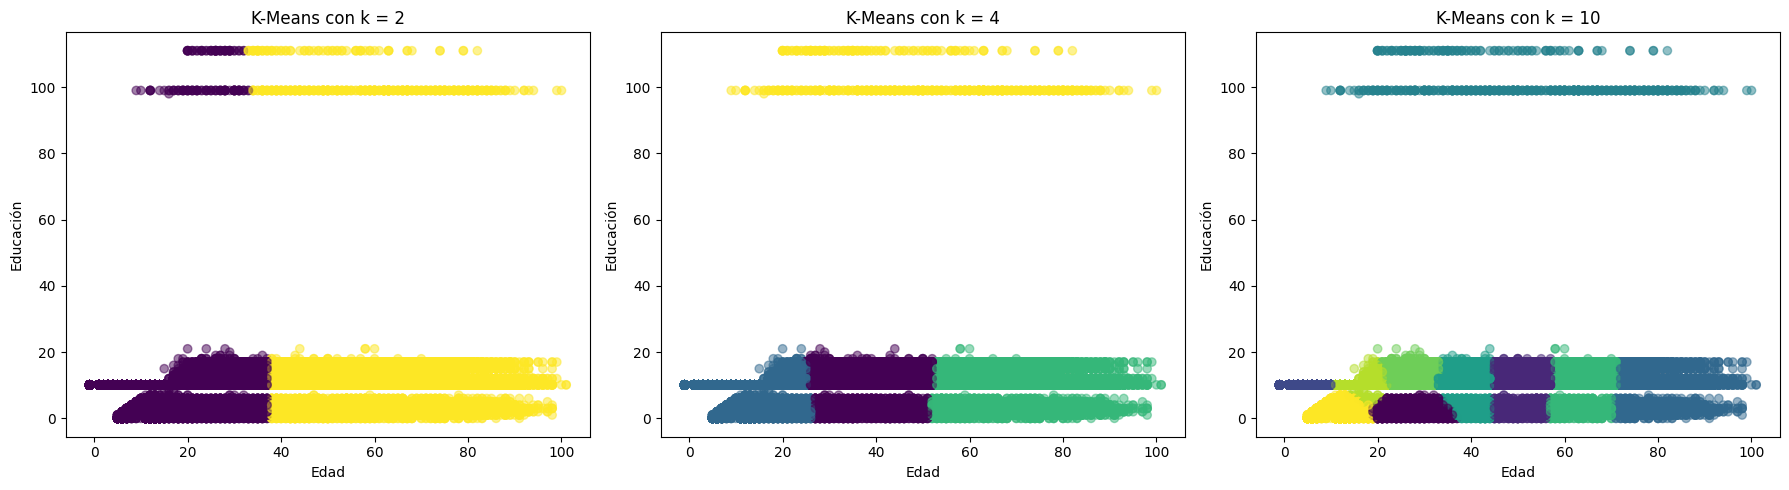

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Definir número de clusters
k_values = [2, 4, 10]

# Diccionario para almacenar resultados
kmeans_results = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    df["cluster_" + str(k)] = kmeans.fit_predict(df[["edad2", "educ"]])  # Usamos edad y educación como predictores
    kmeans_results[k] = kmeans

# Visualización de los clusters
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, k in enumerate(k_values):
    axes[i].scatter(df["edad2"], df["educ"], c=df["cluster_" + str(k)], cmap="viridis", alpha=0.5)
    axes[i].set_title(f"K-Means con k = {k}")
    axes[i].set_xlabel("Edad")
    axes[i].set_ylabel("Educación")

plt.tight_layout()
plt.show()